In [93]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from models import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
data_path='/users/mtaranov/NN_all_data/'

X_train = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched_chr/X_train_thres_10_chr.npy')
y_train = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched_chr/y_train_thres_10_chr.npy')
X_valid = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched_chr/X_valid_thres_10_chr.npy')
y_valid = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched_chr/y_valid_thres_10_chr.npy')
X_test = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched_chr/X_test_thres_10_chr.npy')
y_test = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched_chr/y_test_thres_10_chr.npy')


"""
X_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')
y_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')
X_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')
y_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')
X_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')
y_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')

X_train = get_features('NN_datasets/train_set_all_reads.npy')
y_train = get_labels('NN_datasets/labels_train_all.npy')
X_valid = get_features('NN_datasets/vali_set_all_reads.npy')
y_valid = get_labels('NN_datasets/labels_vali_all.npy')
X_test = get_features('NN_datasets/test_set_all_reads.npy')
y_test = get_labels('NN_datasets/labels_test_all.npy')

X_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)
X_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)
X_test_subsampled, y_test_subsampled = subsample_data(X_test, y_test)
"""

"\nX_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')\ny_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')\nX_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')\ny_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')\nX_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')\ny_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')\n\nX_train = get_features('NN_datasets/train_set_all_reads.npy')\ny_train = get_labels('NN_datasets/labels_train_all.npy')\nX_valid = get_features('NN_datasets/vali_set_all_reads.npy')\ny_valid = get_labels('NN_datasets/labels_vali_all.npy')\nX_test = get_features('NN_datasets/test_set_all_reads.npy')\ny_test = get_labels('NN_datasets/labels_test_all.npy')\n\nX_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)\nX_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)\nX_test_subsampled, y_test_subsampled = 

In [124]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [96]:
dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)

In [97]:
#validation_data = (X_valid_normalized_subsampled[:, :, :10, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :10, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)

Training model...
Train on 1256 samples, validate on 538 samples
Epoch 1/100
1256/1256 [==============================] - 0s - loss: 1.3394 - val_loss: 0.6654
Epoch 0: validation loss: 0.665
Balanced Accuracy: 59.85%	 auROC: 0.647	 auPRC: 0.645	 auPRG: 0.275
Recall at 5%|10%|20% FDR: 1.5%|1.5%|3.0%	 Num Positives: 269	 Num Negatives: 269	 

Epoch 2/100
1256/1256 [==============================] - 0s - loss: 1.3035 - val_loss: 0.6638
Epoch 1: validation loss: 0.664
Balanced Accuracy: 59.29%	 auROC: 0.640	 auPRC: 0.641	 auPRG: 0.252
Recall at 5%|10%|20% FDR: 3.0%|3.0%|9.3%	 Num Positives: 269	 Num Negatives: 269	 

Epoch 3/100
1256/1256 [==============================] - 0s - loss: 1.2707 - val_loss: 0.6672
Epoch 2: validation loss: 0.667
Balanced Accuracy: 58.92%	 auROC: 0.630	 auPRC: 0.626	 auPRG: 0.238
Recall at 5%|10%|20% FDR: 1.1%|1.1%|5.2%	 Num Positives: 269	 Num Negatives: 269	 

Epoch 4/100
1256/1256 [==============================] - 0s - loss: 1.2391 - val_loss: 0.6692
Epoch 3

## preds on distance-matched

In [98]:
print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))

Balanced Accuracy: 69.78%	 auROC: 0.740	 auPRC: 0.717	 auPRG: 0.517
Recall at 5%|10%|20% FDR: 0.0%|0.0%|11.1%	 Num Positives: 225	 Num Negatives: 225	 


In [99]:
print(dnn_normalized.test(X_train_normalized[:, :, :10:, :], y_train))

Balanced Accuracy: 80.25%	 auROC: 0.873	 auPRC: 0.885	 auPRG: 0.796
Recall at 5%|10%|20% FDR: 48.2%|68.8%|80.7%	 Num Positives: 628	 Num Negatives: 628	 


In [100]:
print(dnn_normalized.test(X_valid_normalized[:, :, :10, :], y_valid))

Balanced Accuracy: 68.59%	 auROC: 0.721	 auPRC: 0.743	 auPRG: 0.462
Recall at 5%|10%|20% FDR: 4.8%|11.5%|40.9%	 Num Positives: 269	 Num Negatives: 269	 


In [101]:
pred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
#np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
#np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
#np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

# with genomic locations

In [106]:
dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)

In [107]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)

Training model...
Train on 1256 samples, validate on 538 samples
Epoch 1/100
1256/1256 [==============================] - 0s - loss: 1.3801 - val_loss: 0.6815
Epoch 0: validation loss: 0.682
Balanced Accuracy: 54.83%	 auROC: 0.577	 auPRC: 0.607	 auPRG: 0.106
Recall at 5%|10%|20% FDR: 2.2%|2.2%|4.8%	 Num Positives: 269	 Num Negatives: 269	 

Epoch 2/100
1256/1256 [==============================] - 0s - loss: 1.3184 - val_loss: 0.6608
Epoch 1: validation loss: 0.661
Balanced Accuracy: 64.13%	 auROC: 0.680	 auPRC: 0.679	 auPRG: 0.374
Recall at 5%|10%|20% FDR: 4.5%|4.5%|9.7%	 Num Positives: 269	 Num Negatives: 269	 

Epoch 3/100
1256/1256 [==============================] - 0s - loss: 1.2689 - val_loss: 0.6455
Epoch 2: validation loss: 0.645
Balanced Accuracy: 66.54%	 auROC: 0.705	 auPRC: 0.698	 auPRG: 0.428
Recall at 5%|10%|20% FDR: 3.3%|7.1%|8.6%	 Num Positives: 269	 Num Negatives: 269	 

Epoch 4/100
1256/1256 [==============================] - 0s - loss: 1.2222 - val_loss: 0.6348
Epoch 3

In [108]:
print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))

Balanced Accuracy: 73.56%	 auROC: 0.807	 auPRC: 0.797	 auPRG: 0.646
Recall at 5%|10%|20% FDR: 6.7%|6.7%|58.7%	 Num Positives: 225	 Num Negatives: 225	 


# with distance only

In [109]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)

In [110]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, 10:, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, 10:, :], y_train, validation_data)

Training model...
Train on 1256 samples, validate on 538 samples
Epoch 1/100
1256/1256 [==============================] - 0s - loss: 1.5310 - val_loss: 0.6839
Epoch 0: validation loss: 0.684
Balanced Accuracy: 53.90%	 auROC: 0.638	 auPRC: 0.638	 auPRG: 0.273
Recall at 5%|10%|20% FDR: 0.0%|0.0%|5.6%	 Num Positives: 269	 Num Negatives: 269	 

Epoch 2/100
1256/1256 [==============================] - 0s - loss: 1.3535 - val_loss: 0.6722
Epoch 1: validation loss: 0.672
Balanced Accuracy: 63.75%	 auROC: 0.660	 auPRC: 0.638	 auPRG: 0.379
Recall at 5%|10%|20% FDR: 1.9%|1.9%|4.8%	 Num Positives: 269	 Num Negatives: 269	 

Epoch 3/100
1256/1256 [==============================] - 0s - loss: 1.2963 - val_loss: 0.6629
Epoch 2: validation loss: 0.663
Balanced Accuracy: 63.57%	 auROC: 0.660	 auPRC: 0.637	 auPRG: 0.379
Recall at 5%|10%|20% FDR: 1.9%|1.9%|4.5%	 Num Positives: 269	 Num Negatives: 269	 

Epoch 4/100
1256/1256 [==============================] - 0s - loss: 1.2632 - val_loss: 0.6603
Epoch 3

In [111]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))

Balanced Accuracy: 59.78%	 auROC: 0.683	 auPRC: 0.624	 auPRG: 0.409
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 225	 Num Negatives: 225	 


# Print prediction

In [112]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched_chr/indx_train_thres_10_chr.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched_chr/indx_valid_thres_10_chr.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched_chr/indx_test_thres_10_chr.npy')

In [113]:
labels_test = y_test.astype(int)
preds_test = pred_probs_test
indx_test = indx_test

In [114]:
NumberOfNodes=2272
preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


# Distance-Matched

In [115]:
# printMatrix(preds_test_2d, '', 1, 1, title='preds')
# printMatrix(labels_test_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


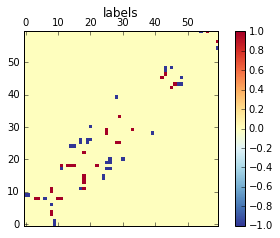

0.980278670788
(60, 60)
Limit: 0.980278670788


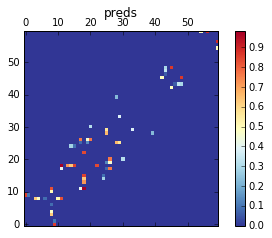

In [116]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_test_2d)+change_scale(preds_test_2d).T, change_scale(labels_test_2d)+change_scale(labels_test_2d).T, zoomIn_window, )